In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nainajaiswal96","key":"df14fe6f94f1e6389fb9b5ea6c753e5f"}'}

In [ ]:
#create kaggle directory


! mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
#Loading kaggle dataset..
!kaggle datasets download -d hsankesara/flickr-image-dataset

100% 8.15G/8.16G [00:40<00:00, 204MB/s]
100% 8.16G/8.16G [00:40<00:00, 215MB/s]


In [ ]:
!unzip flickr-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5354911151.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/535529555.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5356236664.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5356318668.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/535830521.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5359437945.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5361355399.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/53614287.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/536147209.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5361551308.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/536156200.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/

In [ ]:
import os

In [ ]:
#Loading Dataset
train_images_list = os.listdir('flickr30k_images/flickr30k_images/flickr30k_images/')
# Create a list of all image names in the directory

In [ ]:
sample_size = 30
train_images_list = train_images_list[:sample_size]

In [ ]:
#Importing Library
import tensorflow as tf
import cv2
# linear algebra
import numpy as np  
# data processing, CSV file I / O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt
import random

In [ ]:
size = (256, 256)
num_channels = 3

In [ ]:
#Defining training and real image empty  array.
train = np.array([None] * sample_size)
real_images = np.array([None] * sample_size)

In [ ]:
#Storing dataset (Flicker30k_images) in empty array.
j = 0
for i in train_images_list:  
    real_images[j] = np.array(plt.imread('flickr30k_images/flickr30k_images/flickr30k_images/' + i))
    train[j] = np.array(plt.imread('flickr30k_images/flickr30k_images/flickr30k_images/' + i))
    j += 1


In [ ]:
#Resizing training images.
j = 0
for i in train:
    train[j] = cv2.resize(i, size)
    train[j] = train[j].reshape(1, size[0], size[1], num_channels)
    j += 1

In [ ]:
#Stack arrays in sequence vertically (row wise)
train = np.vstack(train[:])

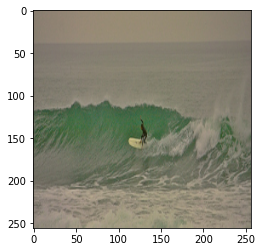

In [ ]:
#Data Visualisation
plt.imshow(np.squeeze(train[0]))
plt.show()

In [ ]:
#The import pandas portion of the code tells Python to bring the pandas data analysis library into your current environment.
import pandas as pd

In [ ]:
#Reading dataset to train_caption variable.
train_captions = pd.read_csv('flickr30k_images/flickr30k_images/results.csv', delimiter='|')

In [ ]:
#Creating a class for getting images id.
def get_images_id(names):
    names = [int(x.split('_')[-1].split('.')[0]) for x in names]
    return names

In [ ]:
#Arranging train_captions in coloumn form in image name, comment_number and comment.
train_captions.columns = ['image_name', 'comment_number', 'comment']

In [ ]:
#Creating a class of image map caption for mapping image caption in train_image_list and train_captions.
def images_map_caption(train_images_list, train_captions):
  #Creating empty list of caption fro storing list of captions.
    caption = []  # list of all captions in training set
    for i in train_images_list:
        caption.append(train_captions[train_captions['image_name'] == i]['comment'].iat[0]) #Appending captions to empty caption list.
    return caption

In [ ]:
#Now in caption variable storing train_images_list and train_captions.
captions = np.array(images_map_caption(train_images_list, train_captions))
print(captions.shape)

(30,)


In [ ]:
import re

In [ ]:
#For start and end tag creating two variable
start_tag = '<s>'
end_tag = '<e>'

In [ ]:
#Creating a class for getting vocabulary captions.
def get_vocab(captions):
    arr = []        #empty array 
    m = captions.shape[0]  
    sentence = [None ] * m  
    j  = 0
    for i in captions:
        i = re.sub(' +',' ',i)
        i = start_tag + ' ' + i + ' ' + end_tag      
        sentence[j] = i.split()                     #Spliting of sentance in start and end tag.
        j += 1
        arr = arr + i.split()                       #Adding in array
    arr = list(set(arr))                            #array in list form
    vocab_size = len(arr)                           #vocab size is equal o length f array
    j = 0
    fwd_dict = {}
    rev_dict = {}
    j = 0
    for i in arr:
        fwd_dict[i] = j                       #Updating forward and backward dict.
        rev_dict[j] = i
        j += 1
    return vocab_size, sentence, fwd_dict, rev_dict

In [ ]:
vocab_size, sentences, fwd_dict, rev_dict = get_vocab(captions)                # Getting captions 

In [ ]:
from scipy.sparse import csr_matrix          # Sparse matrices can be used in arithmetic operations: addition, subtraction, multiplication, division, matrix power.
from scipy.sparse import vstack              # arranging in vertical stack.

In [ ]:
#Getting caption (words) from sentence and arranging them in vertical stack...
m = len(sentences)
train_caption = [None] * m
i = 0
for sentence in sentences:
    cap_array = None
    for word in sentence:
        row = [0]
        col = [fwd_dict[word]]
        data = [1]
        if cap_array is None:
            cap_array = csr_matrix((data, (row, col)), shape=(1, vocab_size))
        else:
            cap_array = vstack((cap_array, csr_matrix((data, (row, col)), shape=(1, vocab_size))))
    train_caption[i] = cap_array
    i += 1

In [ ]:
train_caption[0].shape

(12, 232)

In [ ]:
#Defining weights and biases
def create_weights(shape, suffix):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.7), name='W_' + suffix)

def create_biases(size, suffix):
    return tf.Variable(tf.zeros([size]), name='b_' + suffix)

In [ ]:
#Model Defining (Convoluitonal layer)

def conv_layer(inp, kernel_shape, num_channels, num_kernels, suffix):
    filter_shape = [kernel_shape[0], kernel_shape[1], num_channels, num_kernels]
    weights = create_weights(shape=filter_shape, suffix=suffix)
    biases = create_biases(num_kernels, suffix=suffix)
    layer = tf.nn.conv2d(input=inp, filter=weights, padding='SAME', strides=[1, 1, 1, 1], name='conv_' + suffix)
    layer += biases
    layer = tf.nn.relu6(layer, name='relu_' + suffix)
    #layer = tf.nn.max_pool(layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2,1], padding= 'SAME')
    return layer

In [ ]:
#Defining flatten layer
def flatten_layer(layer, suffix):
    layer_shape = layer.get_shape()
    num_features = layer_shape[1:4].num_elements()
    layer = tf.reshape(layer, [-1, num_features], name='flat_' + suffix )
    return layer
    

In [ ]:
#Defining dense layer
def dense_layer(inp, num_inputs, num_outputs, suffix, use_relu=True):
    weights = create_weights([num_inputs, num_outputs], suffix)
    biases = create_biases(num_outputs, suffix)
    layer = tf.matmul(inp, weights) + biases
    layer = tf.nn.relu(layer)
    return layer

In [ ]:
#Defining RNN layer
def rnn_cell(Win ,Wout, Wfwd, b, hprev, inp):
    h = tf.tanh(tf.add(tf.add(tf.matmul(inp, Win), tf.matmul(hprev, Wfwd)), b))
    out = tf.matmul(h, Wo)
    return h, out
import tensorflow as tf

In [ ]:
tf.device("/device:GPU:0")

In [ ]:
#Hyperparameter defining...
learning_rate = 0.0001
training_iters = 3000
display_step = 500
max_sent_limit = 50
num_tests = 12
bridge_size = 1024
keep_prob = 0.3

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
#Defining all layers of model using LSTM, RNN, CNN..
x_caption = tf.placeholder(tf.float32, [None, vocab_size], name = 'x_caption')
x_inp = tf.placeholder(tf.float32, shape=[1, size[0],size[1],num_channels], name='x_image')
y = tf.placeholder(tf.float32, [None, vocab_size], name = 'x_caption')
Wconv = tf.Variable(tf.truncated_normal([bridge_size, vocab_size], stddev=0.7))
bconv = tf.Variable(tf.zeros([1, vocab_size]))
Wi= tf.Variable(tf.truncated_normal([vocab_size, vocab_size], stddev=0.7))
Wf= tf.Variable(tf.truncated_normal([vocab_size, vocab_size], stddev=0.7))
Wo= tf.Variable(tf.truncated_normal([vocab_size, vocab_size], stddev=0.7))
b = tf.Variable(tf.zeros([1, vocab_size]))
layer_conv1 = conv_layer(inp=x_inp, kernel_shape=(3, 3), num_kernels=32, num_channels=3, suffix='1')
layer_conv2 = conv_layer(inp=layer_conv1, kernel_shape=(3, 3), num_kernels=32, num_channels=32, suffix='2')
maxpool1 = tf.nn.max_pool(layer_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2,1], padding= 'SAME')
layer_conv3 = conv_layer(inp=maxpool1, kernel_shape=(3, 3), num_kernels=64, num_channels=32, suffix='3')
layer_conv4 = conv_layer(inp=layer_conv3, kernel_shape=(3, 3), num_kernels=64, num_channels=64, suffix='4')
maxpool2 = tf.nn.max_pool(layer_conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2,1], padding= 'SAME')
layer_conv5 = conv_layer(inp=maxpool2, kernel_shape=(3, 3), num_kernels=128, num_channels=64, suffix='5')
layer_conv6 = conv_layer(inp=layer_conv5, kernel_shape=(3, 3), num_kernels=128, num_channels=128, suffix='6')
maxpool3 = tf.nn.max_pool(layer_conv6, ksize=[1, 2, 2, 1], strides=[1, 2, 2,1], padding= 'SAME')
layer_conv7 = conv_layer(inp=maxpool3, kernel_shape=(3, 3), num_kernels=256, num_channels=128, suffix='7')
layer_conv8 = conv_layer(inp=layer_conv7, kernel_shape=(3, 3), num_kernels=256, num_channels=256, suffix='8')
flat_layer = flatten_layer(layer_conv8, suffix='9')
#flat_layer = tf.layers.dropout(flat_layer, rate= keep_prob)
dense_layer_1 = dense_layer(inp=flat_layer, num_inputs=262144 , num_outputs=bridge_size, suffix='10')
start_hook = tf.cast(csr_matrix(([1], ([0], [fwd_dict[start_tag]])), shape=(1, vocab_size)).A, tf.float32)
end_hook = tf.cast(csr_matrix(([1], ([0], [fwd_dict[end_tag]])), shape=(1, vocab_size)).A, tf.float32)
hook = tf.slice(x_caption, [0, 0], [1, vocab_size])
h = dense_layer_1
h, out = rnn_cell(Wi ,Wo, Wconv, bconv, h, hook)

In [ ]:
#Defining previous and current function, so that we can initialise previous as 0 and store vocab in current...
def fn(prev, curr):
    h = prev[0]
    curr = tf.reshape(curr, [1, vocab_size])
    h, out = rnn_cell(Wi ,Wo, Wf, b, h, curr)  #defining output layer
    return h, out
_, output = tf.scan(fn, x_caption[1:], initializer=(h, out))
output = tf.squeeze(output, axis  = 1)
outputs = tf.concat([out, output], axis = 0)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=outputs, labels=y)) #using cross entrophy loss function
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)                             # using adam optimiser to minimise cost function.
pred = tf.nn.softmax(outputs)                                                                 #prediction in softmax output layer
# Model evaluation                                                                                                                                                    
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))                                  #comparing with original caption to predicted caption, to get accuracy of our model...
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))                                   #Acuuracy Calculation cand converting in floating point..

In [ ]:
out_tensor = tf.TensorArray(dtype=tf.float32, dynamic_size=True, size = 0)            #Defining output layer....
htest = dense_layer_1
htest, out_first = rnn_cell(Wi ,Wo, Wconv, bconv, htest, start_hook)                  #Storing all output to rnn cell.
t = 0
out_ = tf.one_hot(tf.argmax(tf.nn.softmax(out_first), 1), depth=vocab_size)
out_tensor = out_tensor.write(t, out_)
t += 1
def condition(res, h, out_tensor, t):
    return tf.logical_and(tf.logical_not(tf.equal(tf.argmax(res, 1)[0], fwd_dict[end_tag])), tf.less(t, max_sent_limit))
def action(res, h, out_tensor, t):
    h, out = rnn_cell(Wi ,Wo, Wf, b, h, res)
    res = tf.one_hot(tf.argmax(tf.nn.softmax(out), 1), depth=vocab_size)
    out_tensor = out_tensor.write(t, res)
    return res, h, out_tensor, t + 1
_, __, final_outputs, T = tf.while_loop(condition, action, [out_, htest, out_tensor, t])   
final_prediction = tf.squeeze(final_outputs.stack())       #Final_output prediction in stack form...
saver = tf.train.Saver()
init = tf.global_variables_initializer()

After  500 iterations: Cost =  11.360715341567992 and Accuracy:  26.191071930030983 %
After  1000 iterations: Cost =  8.357436231772105 and Accuracy:  40.116378565629326 %
After  1500 iterations: Cost =  6.502959014972051 and Accuracy:  50.99914977947871 %
After  2000 iterations: Cost =  5.692384207248688 and Accuracy:  50.12823591629664 %
After  2500 iterations: Cost =  4.3318730163077515 and Accuracy:  55.33779750267664 %
After  3000 iterations: Cost =  4.402987347046534 and Accuracy:  53.16447198390961 %
Optimization finished!
Let's check
(21, 232)
Predicted Caption:-> A lady is filming school age children wearing about shirt race-bibs are black pants tongue in Two cement rides . 
Orignal Caption:-> A lady is filming school age children in an African village . 


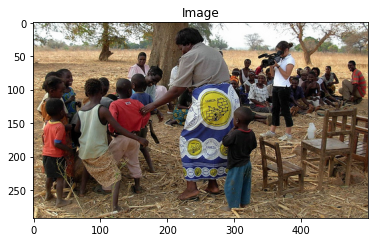

(22, 232)
Predicted Caption:-> Two children play in the water man above-ground above-ground protective one dark yellow in jeans person Sooners ocean their animals . 
Orignal Caption:-> Two children play in the water of an above-ground pool . 


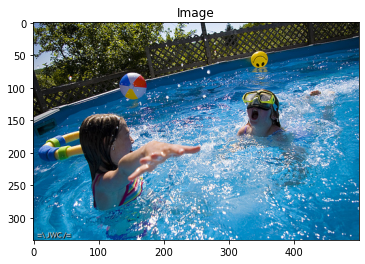

(11, 232)
Predicted Caption:-> War protesters on curb , with pink umbrellas out in 
Orignal Caption:-> War protesters on curb , with pink umbrellas spelling out IMPEACH . 


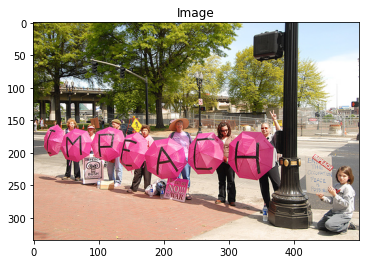

(17, 232)
Predicted Caption:-> Woman being pulled from a boat on in bass them in bass a yellow at . 
Orignal Caption:-> Woman being pulled from a boat on a yellow tube across the lake . 


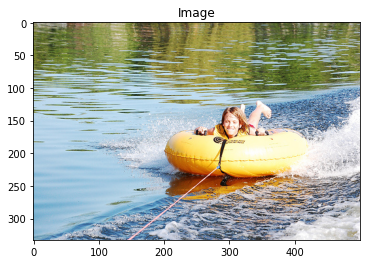

(32, 232)
Predicted Caption:-> Two african-american women a standing in is and cashing building open in wetsuit water is slide village a running tutus curve man next down inside white dark watching below grab slide 
Orignal Caption:-> Two african-american women are standing in a city wearing tutus , one white and one blue . 


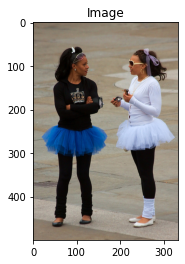

(11, 232)
Predicted Caption:-> A surfer rides out the tank to white waves . 
Orignal Caption:-> A surfer rides out the green and white waves . 


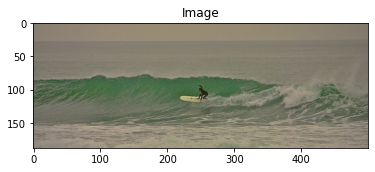

(31, 232)
Predicted Caption:-> Several people talking and spending time together in above-ground grassy of chalk on , public and road man of one blue at jacket clever pool . inside lake roadwork . 
Orignal Caption:-> Several people talking and spending time together in a room . 


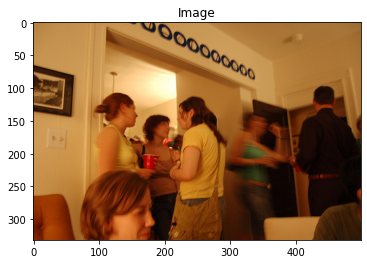

(32, 232)
Predicted Caption:-> Two african-american women a standing in is and cashing building open in wetsuit water is slide village a running tutus curve man next down inside white dark watching below grab slide 
Orignal Caption:-> Two african-american women are standing in a city wearing tutus , one white and one blue . 


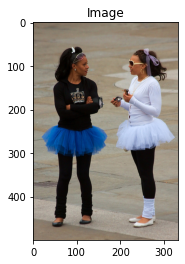

(13, 232)
Predicted Caption:-> A man wearing all black plays some wearing crowd wearing open . 
Orignal Caption:-> A man wearing all black plays a coffee-burst bass guitar with a band . 


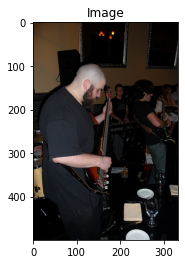

(26, 232)
Predicted Caption:-> A lady with a hurt hand is of the her purchases white her out including man rocky computer cleared bass running spelling cashier IMPEACH jacket 
Orignal Caption:-> A lady with a hurt hand is cashing out her purchases at the grocery mart by a cashier in a black and red jacket . 


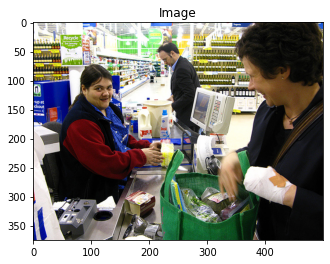

(46, 232)
Predicted Caption:-> Two girls draw on cement waves chalk animals including women kiss slide runners , Sooners otherwise umbrellas above-ground out IMPEACH tending gear minimal over of sliding mouse crowd running village air gear coffee-burst white building shadow one runners over protesters watching minimal girls tending tutus 
Orignal Caption:-> Two girls draw on cement with chalk with the ocean in the background . 


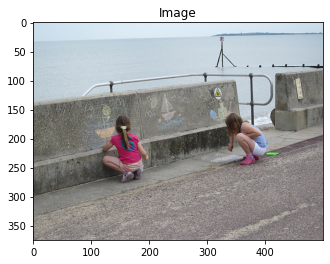

(13, 232)
Predicted Caption:-> A bicyclist is attempting spending watching while and minimal one lake . 
Orignal Caption:-> A bicyclist is attempting a trick while wearing minimal protective gear . 


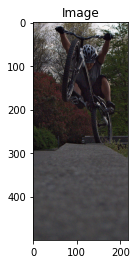

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    m = len(train_caption)
    for epoch in range(training_iters):                              #Model training...
        total_cost = 0
        total_acc = 0
        for i in range(m):                                         #Defining all training parameters
            _, cst, acc = sess.run([optimizer, cost, accuracy], feed_dict = {x_caption:train_caption[i][:-1].A, x_inp:train[i:i+1], y:train_caption[i][1:].A})
            total_cost += cst      #Updating cost function and accuracy.....
            total_acc += acc
        if (epoch + 1) % display_step == 0:    
            print('After ', (epoch + 1), 'iterations: Cost = ', total_cost / m, 'and Accuracy: ', total_acc * 100/ m , '%' )
    print('Optimization finished!')
    print("Let's check")

    #Predicting image captions and comparing from original captions....
    for tests in range(num_tests):
        image_num = random.randint(0, sample_size - 1)
        caption = sess.run(final_prediction, feed_dict = {x_inp:train[image_num:image_num + 1]})
        print(caption.shape)
        caption = np.argmax(caption[:-1], 1)
        capt = ''
        for i in caption:
            capt += rev_dict[i] + ' '
        print('Predicted Caption:->', capt)
        orig_cap = np.argmax(train_caption[image_num:image_num + 1][0][1:-1].A, 1)
        orignalcaption = ''
        for i in orig_cap:
            orignalcaption += rev_dict[i] + ' '
        print('Orignal Caption:->', orignalcaption)
        plt.imshow(real_images[image_num])
        plt.title('Image')
        
        plt.show()